# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [2]:
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_excel('Dataset3.xlsx')
dataset.info()

#X=X.to_list()

#y=y.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_type        546 non-null    object 
 1   Charge_size        546 non-null    float64
 2   Standoff_distance  546 non-null    float64
 3   Incident_pressure  546 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.2+ KB


In [3]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Charge_type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_size        546 non-null    float64
 1   Standoff_distance  546 non-null    float64
 2   Incident_pressure  546 non-null    float64
 3   Charge_type_CompB  546 non-null    uint8  
 4   Charge_type_TNT    546 non-null    uint8  
dtypes: float64(3), uint8(2)
memory usage: 14.0 KB


In [4]:
dataset.head()

,Charge_size,Standoff_distance,Incident_pressure,Charge_type_CompB,Charge_type_TNT
0,0.5,1.5,283.258,0,1
1,0.5,2.5,163.904,0,1
2,0.5,3.5,135.678,0,1
3,0.5,4.5,124.039,0,1
4,0.5,5.5,117.856,0,1


In [6]:
# our target variable is 'median_house_value'
y = dataset['Incident_pressure']
X = dataset.drop('Incident_pressure', axis=1)
print(X.shape, y.shape)

(546, 4) (546,)


In [7]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Alternative X and y spliting

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data
### Encoding the Independent Variable

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#X_train=np.asarray(X_train).astype(np.int)

#y_train=np.asarray(y_train).astype(np.int)

## Part 2 - Building the ANN

### Initializing the ANN

In [9]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1000, input_shape=(X_train.shape[1],), activation='relu'))

### Adding the second hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units=500, activation='relu'))

### Adding the third hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=250, activation='relu'))

### Adding the output layer

In [14]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

### what model looks like

In [16]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1000)              5000      
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 1)                 251       
                                                                 
Total params: 631,001
Trainable params: 631,001
Non-trainable params: 0
_________________________________________________________________


## Part 3 - Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

### early stopping callback

In [19]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [20]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

Epoch 1/5000
9/9 [==============================] - 2s 32ms/step - loss: 1238607.7500 - mae: 403.0742 - val_loss: 508215.9375 - val_mae: 229.3521
Epoch 2/5000
9/9 [==============================] - 0s 14ms/step - loss: 1160676.0000 - mae: 351.3427 - val_loss: 473177.4062 - val_mae: 304.3972
Epoch 3/5000
9/9 [==============================] - 0s 13ms/step - loss: 1086315.3750 - mae: 460.5720 - val_loss: 471945.5312 - val_mae: 358.8458
Epoch 4/5000
9/9 [==============================] - 0s 13ms/step - loss: 1036321.0000 - mae: 456.6007 - val_loss: 430297.5938 - val_mae: 301.4990
Epoch 5/5000
9/9 [==============================] - 0s 12ms/step - loss: 979614.6250 - mae: 407.2930 - val_loss: 398421.3125 - val_mae: 276.2091
Epoch 6/5000
9/9 [==============================] - 0s 12ms/step - loss: 915704.8750 - mae: 397.3226 - val_loss: 373183.8125 - val_mae: 282.1112
Epoch 7/5000
9/9 [==============================] - 0s 15ms/step - loss: 835323.6875 - mae: 389.7420 - val_loss: 342228.8125 -

### Predicting the results of the Test set

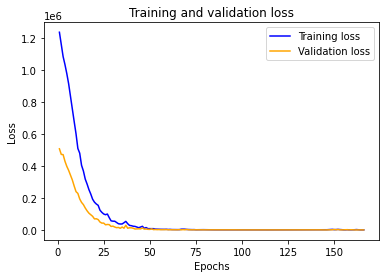

In [42]:
import matplotlib.pyplot as plt
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

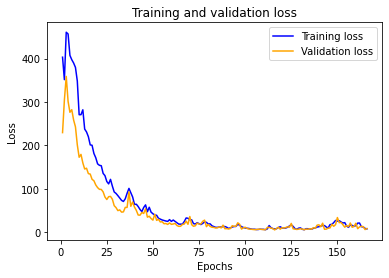

In [41]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
print (epochs)

range(1, 167)


4/4 [==============================] - 0s 3ms/step


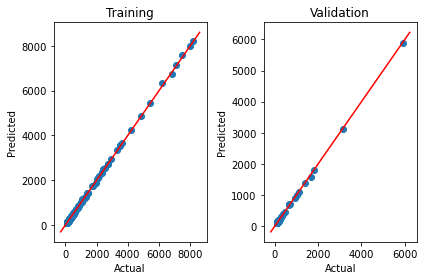

In [24]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=ann.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [25]:
#X_test=np.asarray(X_test).astype(np.int)

#y_test=np.asarray(y_test).astype(np.int)

y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 3ms/step
[[ 124.79  126.21]
 [ 136.67  136.68]
 [ 701.82  697.97]
 [ 118.75  120.33]
 [ 901.2   908.62]
 [ 107.57  105.17]
 [ 286.75  292.65]
 [ 116.87  114.76]
 [ 119.64  122.15]
 [ 147.1   149.03]
 [ 151.68  151.21]
 [ 389.15  384.85]
 [ 120.58  122.44]
 [ 111.58  108.02]
 [ 107.08  104.34]
 [ 184.62  187.24]
 [ 177.48  180.92]
 [ 152.07  155.65]
 [ 209.04  218.53]
 [ 108.43  110.55]
 [1588.66 1649.83]
 [ 117.05  119.95]
 [ 119.3   120.34]
 [ 106.73  107.75]
 [ 671.34  647.73]
 [ 110.99  111.93]
 [ 229.66  242.76]
 [ 115.72  117.74]
 [ 133.06  133.28]
 [ 135.87  135.82]
 [ 217.69  227.9 ]
 [ 144.66  148.37]
 [ 123.28  126.47]
 [ 120.51  116.61]
 [ 120.04  111.98]
 [ 119.73  120.63]
 [ 122.55  125.91]
 [ 120.79  123.56]
 [ 105.56  103.93]
 [ 291.37  305.53]
 [ 117.39  118.49]
 [ 106.39  104.99]
 [ 105.68  103.39]
 [ 108.07  106.75]
 [ 146.6   149.23]
 [ 128.57  130.47]
 [ 141.99  143.94]
 [ 122.33  124.59]
 [ 209.82  216.19]
 [ 117.1   111.05]

Text(0, 0.5, 'Predicted data')

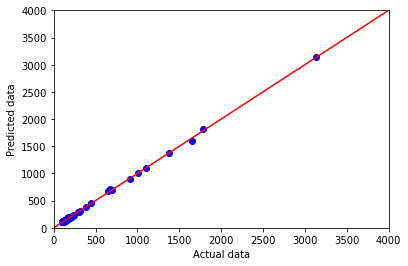

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,4000],[0,4000], color = "red")
plt.axis ([0,4000,0,4000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

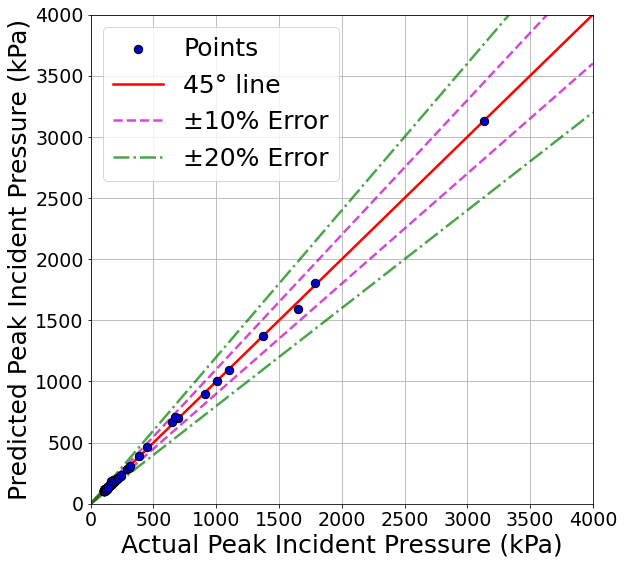

In [29]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(0,4000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 4000)
plt.xlim(0, 4000)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax1.annotate("$R^2$ = {:.3f}".format(r2), (2500, 1000),fontsize = 25)  #Model is called here
#ax1.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (2500, 750),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

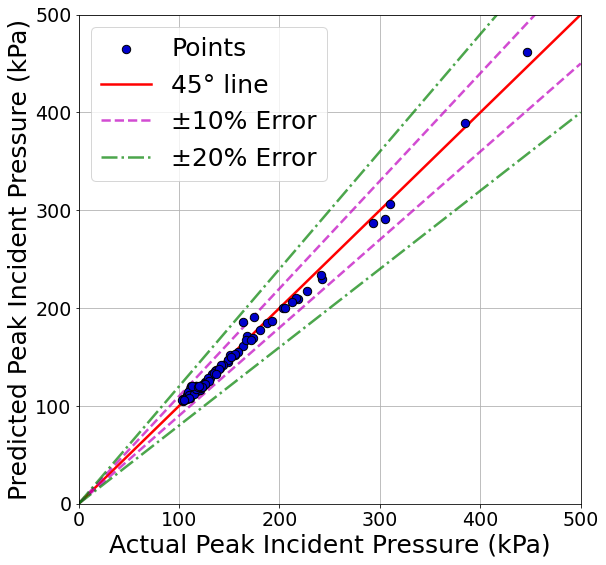

In [30]:
# Initialize layout
fig2, bx = plt.subplots(figsize = (9, 9))



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')




plt.ylabel('Predicted Peak Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Peak Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)



x1 = np.linspace(0,500)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7) #\u00B1
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 500)
plt.xlim(0, 500)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [34]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

14/14 [==============================] - 0s 3ms/step
6.27460461509775
5.256938153076168


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9997427262777269


In [35]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9997805559896955
